In [2]:
# Practical 6: Continuous Bag of Words (CBOW) Model – Document 1

# Step 1: Import Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Lambda, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

 

In [3]:

# Step 2: Prepare Sample Text Data
text = "machine learning allows computers to learn from data without being explicitly programmed"
text = text.lower().split()


In [4]:

# Step 3: Tokenize Words and Create Vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
word2id = tokenizer.word_index
id2word = {v: k for k, v in word2id.items()}
vocab_size = len(word2id) + 1

In [5]:

# Step 4: Generate Training Data for CBOW
window_size = 2
data = []

for i in range(window_size, len(text) - window_size):
    context = []
    for j in range(-window_size, window_size + 1):
        if j != 0:
            context.append(word2id[text[i + j]])
    target = word2id[text[i]]
    data.append((context, target))

X = np.array([x for x, _ in data])
y = np.array([y for _, y in data])


In [6]:

# Step 5: Define CBOW Model Architecture
embedding_dim = 10
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=2 * window_size),
    Lambda(lambda x: K.mean(x, axis=1), output_shape=(embedding_dim,)),
    Dense(vocab_size, activation='softmax')
])



In [7]:
# Step 6: Compile the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')



In [8]:
# Step 7: Train the Model
history = model.fit(X, y, epochs=100, verbose=0)
print("Training complete.")



Training complete.


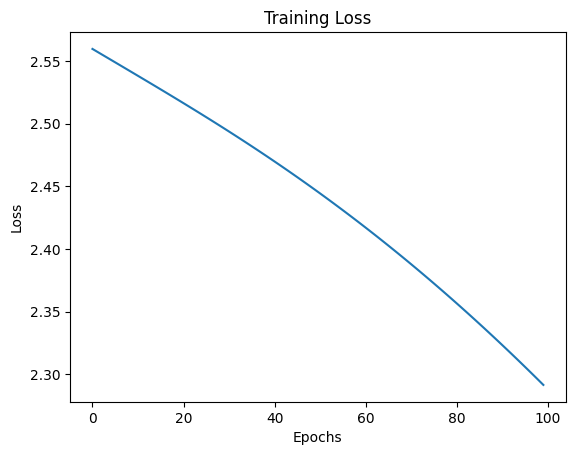

In [9]:
# Step 8: Plot Training Loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



In [10]:
# Step 9: Display Word Embeddings
weights = model.get_weights()[0]
for word, idx in word2id.items():
    print(f"{word}: {weights[idx]}")







    
# ------------------------------------------------------------
# EXPLANATION OF EACH STEP
# ------------------------------------------------------------
# Step 1: Import Libraries
# - TensorFlow/Keras for building the CBOW neural network.
# - Tokenizer and skipgrams for preprocessing and word pair generation.
# - Matplotlib for plotting loss curve.

# Step 2: Prepare Sample Text Data
# - Small sample sentence converted to lowercase and split into words.
# - This acts as our "document 1" for learning word relationships.

# Step 3: Tokenize Words and Create Vocabulary
# - Tokenizer converts each word into an integer ID.
# - Vocabulary size = total unique words + 1 for padding.

# Step 4: Generate Training Data
# - CBOW predicts the center word from surrounding context words.
# - Context window = 2 words before and 2 after target word.
# - Example: for "computers" in the sentence, context = ["learning", "allows", "to", "learn"].

# Step 5: Define CBOW Model Architecture
# - Embedding layer: converts each word into a dense vector representation.
# - Lambda layer: averages embeddings of context words.
# - Dense layer: outputs probability for all vocabulary words.

# Step 6: Compile the Model
# - Loss: sparse categorical crossentropy (predicting one correct word).
# - Optimizer: Adam (adaptive learning).

# Step 7: Train the Model
# - Model learns context-word relationships for 100 epochs.
# - Learns semantic meaning (similar words get similar embeddings).

# Step 8: Plot Training Loss
# - Visualizes how model loss decreases over time.

# Step 9: Display Word Embeddings
# - Displays learned vector representations (10-dimensional).
# - Words with similar meanings have similar embeddings.

# ------------------------------------------------------------
# VIVA QUESTIONS
# ------------------------------------------------------------
# Q1. What is the CBOW model?
#     -> A neural network that predicts the target word using context words.
# Q2. What is the difference between CBOW and Skip-Gram?
#     -> CBOW predicts the center word; Skip-Gram predicts surrounding words.
# Q3. What is a context window?
#     -> Number of words before and after the target word used for prediction.
# Q4. What does the Embedding layer do?
#     -> Converts word IDs into dense vector representations.
# Q5. Why use the mean of embeddings?
#     -> Averages context word vectors to get a single input vector for prediction.
# Q6. What optimizer and loss function are used?
#     -> Adam optimizer and sparse categorical crossentropy.
# Q7. What is the goal of word embeddings?
#     -> Capture semantic relationships between words in vector space.
# Q8. What output do we get from CBOW?
#     -> Probability distribution over all words for the predicted target.
# Q9. What indicates successful training?
#     -> Loss decreases steadily over epochs.
# Q10. Applications of CBOW?
#     -> Used in Word2Vec, NLP tasks like sentiment analysis, and search engines.

machine: [ 0.12941727  0.08403978  0.08238157 -0.11605775 -0.13049825 -0.11824565
  0.0750144   0.15944912 -0.06826733  0.08528006]
learning: [ 0.11254112  0.15073541  0.1770504   0.03327081  0.11039139 -0.10863071
  0.16472846  0.02361841  0.06545272  0.14347708]
allows: [ 0.18192261  0.00680027 -0.03186563  0.09473635  0.05606344 -0.11342289
 -0.04219609  0.08120142  0.06396659  0.1024903 ]
computers: [ 0.15333188 -0.06300416  0.04242593 -0.06695528 -0.1917338  -0.19508663
 -0.02147876  0.20203772 -0.13210413  0.19404264]
to: [ 0.0290027   0.07495036  0.11868488  0.02430397 -0.04336016 -0.01909207
  0.215057    0.18251233  0.07249918  0.05333564]
learn: [ 0.02506285  0.00700688 -0.17271468  0.1945567   0.05391405 -0.10094209
  0.0395239   0.05618646  0.1789925  -0.0845984 ]
from: [ 0.07966462 -0.08180331 -0.0200645   0.13555434 -0.00980247 -0.14504664
 -0.06633978  0.11613632 -0.08508559 -0.07561764]
data: [-0.08794622  0.12445986  0.00084424 -0.01654508 -0.07687996  0.05924944
  0.1